In [1]:
## Load necessary libraries
library(tidyverse)
library(dplyr)
library(caret)
library(Metrics)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.0     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.1     ✔ tibble    3.1.8
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift


The following object is masked from ‘package:httr’:

    progress



Attaching package: ‘Metrics’


The following objects are masked from ‘package:caret’:

    precision, recall




In [2]:
#Loading Data
dataset = read.csv("/kaggle/input/cambridge-massachusetts-airbnb-open-data/listings.csv")
colnames(dataset)

[1] "id"                             "name"                          
 [3] "host_id"                        "host_name"                     
 [5] "neighbourhood_group"            "neighbourhood"                 
 [7] "latitude"                       "longitude"                     
 [9] "room_type"                      "price"                         
[11] "minimum_nights"                 "number_of_reviews"             
[13] "last_review"                    "reviews_per_month"             
[15] "calculated_host_listings_count" "availability_365"              
[17] "number_of_reviews_ltm"          "license"

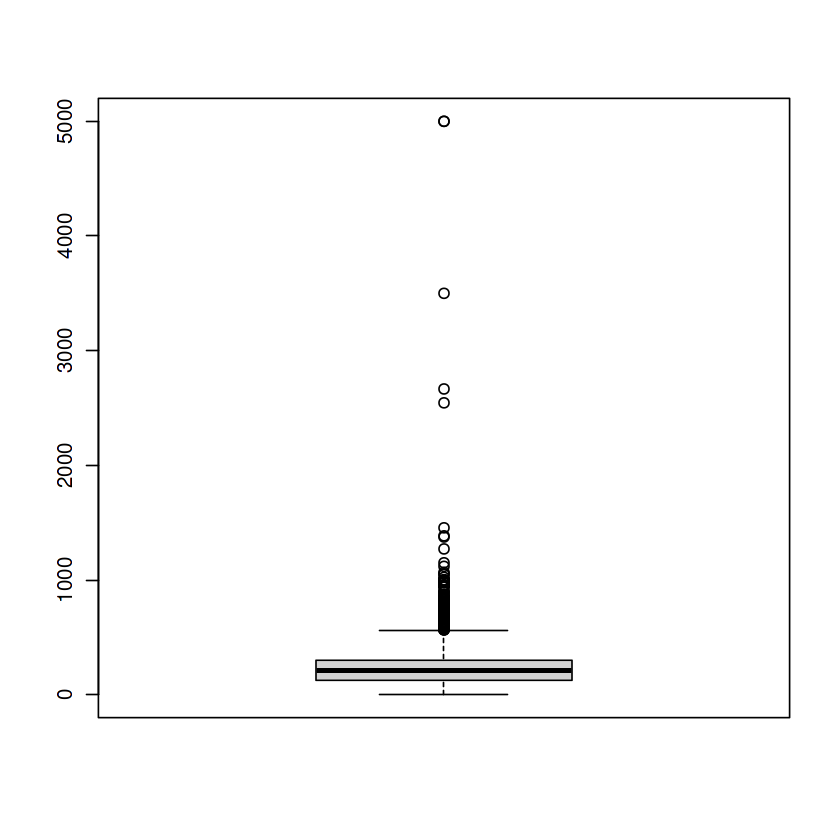

In [3]:
#outliers...
outliers <- boxplot(dataset$price)$out

# Filter out rows with outlier values
df <- dataset[!(dataset$price %in% outliers), ]

In [4]:
#prepdata for regression:
df$room_type <- factor(df$room_type)
df$neighbourhood <- factor(df$neighbourhood)

In [5]:
# Reducing the dataset to 500 entries
set.seed(546)
df=df[sample(nrow(df), 1000), ]

##
df= select(df,price,neighbourhood,room_type,minimum_nights)

In [6]:
#null values ::omit or window method
old_value=""
new_value=NA
df <- df %>%
  mutate_all(~replace(., . == old_value, new_value))

summary(df)

     price                     neighbourhood           room_type  
 Min.   :  0.0   Area 2/MIT           :285   Entire home/apt:693  
 1st Qu.:120.0   East Cambridge       :239   Hotel room     :  5  
 Median :200.0   North Cambridge      : 90   Private room   :296  
 Mean   :212.5   Cambridgeport        : 75   Shared room    :  6  
 3rd Qu.:288.2   Wellington-Harrington: 65                        
 Max.   :552.0   West Cambridge       : 54                        
                 (Other)              :192                        
 minimum_nights  
 Min.   :  1.00  
 1st Qu.:  1.75  
 Median :  7.00  
 Mean   : 24.07  
 3rd Qu.: 32.00  
 Max.   :364.00  
                 

In [7]:
#range of price
summary(df$price)

#price can not be 0 so changing --- to next min value
k=head(table(df$price), n = 5)
df$price <- ifelse(df$price < 1, 10, df$price)
head(table(df$price), n = 5)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    0.0   120.0   200.0   212.5   288.2   552.0 


10 11 29 32 39 
 5  1  1  1  1 

In [8]:
# Split the dataset into training and testing sets
set.seed(546) # For reproducibility
train_indices <- sample(nrow(df), nrow(df)*0.8) # 80% for training
train_data <- df[train_indices, ]
test_data <- df[-train_indices, ]

In [9]:
## view dimensions
dim(df)
dim(train_data)
dim(test_data)


[1] 1000    4

[1] 800   4

[1] 200   4

In [10]:
## see data type
str(train_data)

'data.frame':	800 obs. of  4 variables:
 $ price         : num  296 169 53 430 97 80 114 55 194 487 ...
 $ neighbourhood : Factor w/ 13 levels "Agassiz","Area 2/MIT",..: 1 2 8 5 5 7 12 10 2 2 ...
 $ room_type     : Factor w/ 4 levels "Entire home/apt",..: 3 1 3 1 3 3 3 3 3 1 ...
 $ minimum_nights: int  1 2 91 2 2 1 2 91 1 32 ...


In [11]:
# Build the linear regression model
model <- lm(price ~ neighbourhood + room_type + minimum_nights, data = train_data)

In [12]:
##see intercepts and slope
model


Call:
lm(formula = price ~ neighbourhood + room_type + minimum_nights, 
    data = train_data)

Coefficients:
                       (Intercept)             neighbourhoodArea 2/MIT  
                          272.6643                             22.5615  
  neighbourhoodCambridge Highlands          neighbourhoodCambridgeport  
                          -48.6964                            -45.2794  
       neighbourhoodEast Cambridge          neighbourhoodMid-Cambridge  
                            2.1010                              2.0926  
    neighbourhoodNeighborhood Nine        neighbourhoodNorth Cambridge  
                            0.5984                            -29.3889  
            neighbourhoodRiverside        neighbourhoodStrawberry Hill  
                          -50.4771                            -78.3288  
             neighbourhoodThe Port  neighbourhoodWellington-Harrington  
                            8.6979                            -45.0666  
       neighb

In [13]:
# To get the overall summary of the linear regression model
summary(model)
anova(model)


Call:
lm(formula = price ~ neighbourhood + room_type + minimum_nights, 
    data = train_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-191.02  -59.42  -17.67   43.42  367.07 

Coefficients:
                                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)                         272.66431   16.31999  16.707  < 2e-16 ***
neighbourhoodArea 2/MIT              22.56155   17.11428   1.318  0.18779    
neighbourhoodCambridge Highlands    -48.69644   47.87670  -1.017  0.30941    
neighbourhoodCambridgeport          -45.27937   19.48123  -2.324  0.02037 *  
neighbourhoodEast Cambridge           2.10098   17.15109   0.122  0.90254    
neighbourhoodMid-Cambridge            2.09257   21.72747   0.096  0.92330    
neighbourhoodNeighborhood Nine        0.59843   29.27261   0.020  0.98369    
neighbourhoodNorth Cambridge        -29.38888   18.77026  -1.566  0.11782    
neighbourhoodRiverside              -50.47706   23.91916  -2.110  0.03515 *  
neighbourhoodSt

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
neighbourhood,12,1840635.5,153386.290,18.88189,2.897492e-36
room_type,3,2365247.6,788415.866,97.05416,2.046831e-53
minimum_nights,1,312863.5,312863.454,38.51356,8.808094e-10
Residuals,783,6360671.3,8123.463,NA,NA


In [14]:
# Make predictions on the test data and train data 
predicted_prices <- predict(model, newdata = test_data)
model_t_preds = model$fitted.values

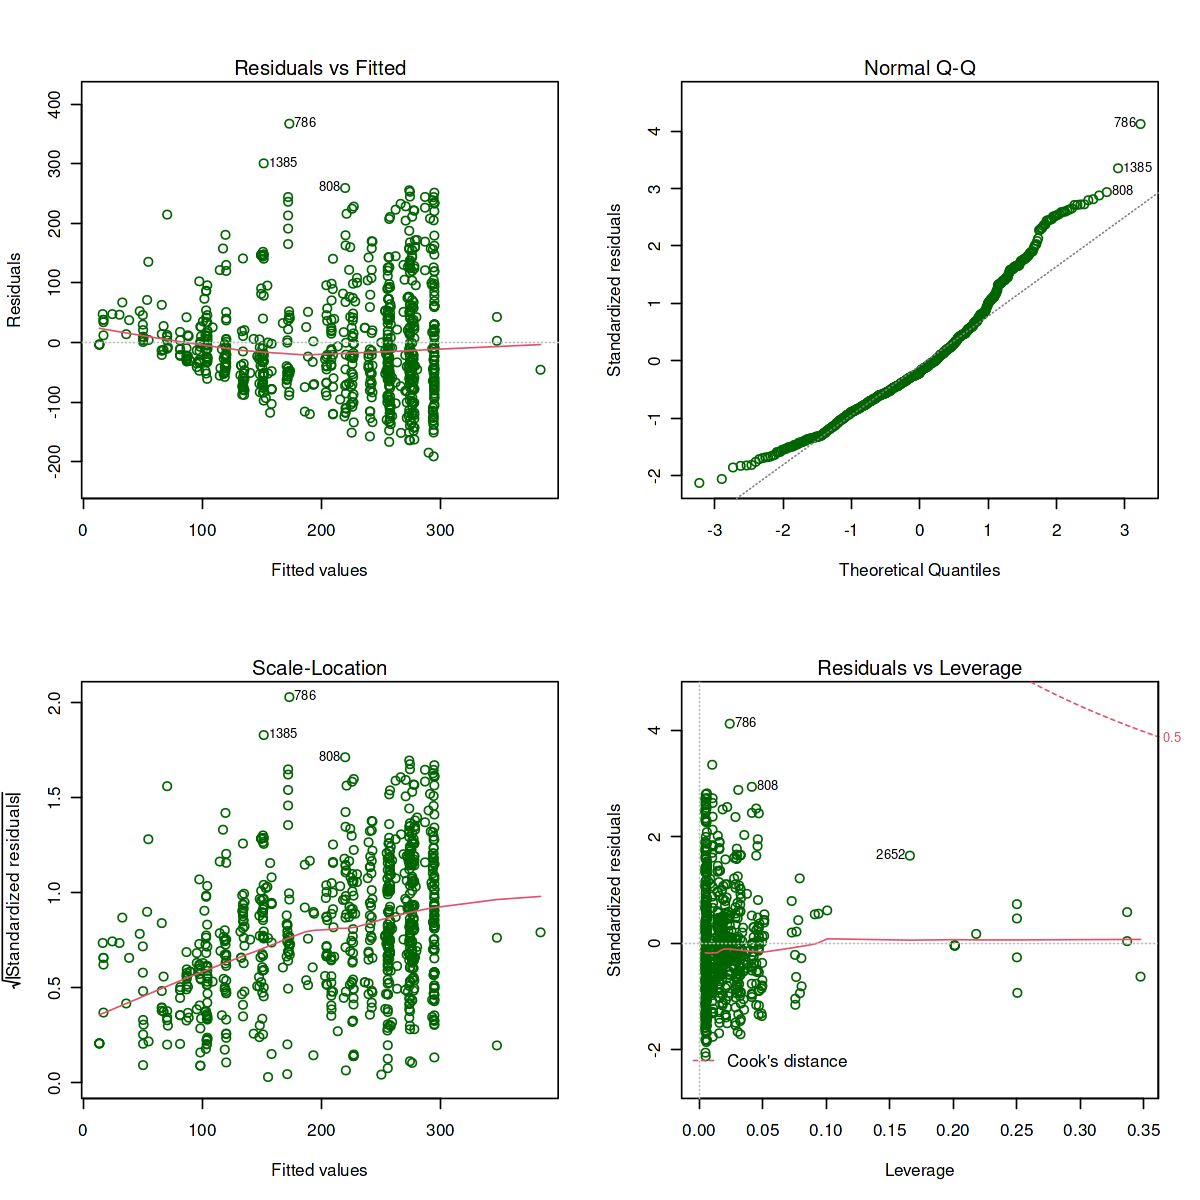

In [15]:
options(repr.plot.width = 10, repr.plot.height = 10)
par(mfrow = c(2,2))
plot(model, col='darkgreen')